In [0]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from matplotlib.text import TextPath

In [3]:
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [4]:
x = tf.placeholder(tf.float32, [None, 784])
y = tf.placeholder(tf.float32, [None, 10])

W1 = tf.Variable(tf.random_normal([784, 1024], stddev=0.03), name='W1')
b1 = tf.Variable(tf.random_normal([1024]), name='b1')
W2 = tf.Variable(tf.random_normal([1024, 1024], stddev=0.03), name='W2')
b2 = tf.Variable(tf.random_normal([1024]), name='b2')
W3 = tf.Variable(tf.random_normal([1024, 1024], stddev=0.03), name='W3')
b3 = tf.Variable(tf.random_normal([1024]), name='b3')
W4 = tf.Variable(tf.random_normal([1024, 1024], stddev=0.03), name='W4')
b4 = tf.Variable(tf.random_normal([1024]), name='b4')
W5 = tf.Variable(tf.random_normal([1024, 1024], stddev=0.03), name='W5')
b5 = tf.Variable(tf.random_normal([1024]), name='b5')
W7 = tf.Variable(tf.random_normal([1024, 10], stddev=0.03), name='W7')
b7 = tf.Variable(tf.random_normal([10]), name='b7')


L1 = tf.nn.relu(tf.add(tf.matmul(x, W1), b1))
L2 = tf.nn.relu(tf.add(tf.matmul(L1, W2), b2))
L3 = tf.nn.relu(tf.add(tf.matmul(L2, W3), b3))
L4 = tf.nn.relu(tf.add(tf.matmul(L3, W4), b4))
L5 = tf.nn.relu(tf.add(tf.matmul(L4, W5), b5))
Y = tf.nn.softmax(tf.add(tf.matmul(L5, W7), b7))

Instructions for updating:
Colocations handled automatically by placer.


In [5]:
y_clipped = tf.clip_by_value(Y, 1e-10, 0.9999999)
cross_entropy = -tf.reduce_mean(tf.reduce_sum(y * tf.log(y_clipped)
                         + (1 - y) * tf.log(1 - y_clipped), axis=1))
optimiser = tf.train.GradientDescentOptimizer(learning_rate=0.005).minimize(cross_entropy)

Instructions for updating:
Use tf.cast instead.


In [0]:
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [0]:
images,labels=mnist.test.next_batch(batch_size=1000)

# **Model Training**

In [8]:
learning_rate = 0.01
epochs = 150
batch_size = 100
optimiser = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cross_entropy)

sess=tf.Session()
# initialise the variables
init_op = tf.global_variables_initializer()
sess.run(init_op)
total_batch = int(len(mnist.train.labels) / batch_size)
for epoch in range(epochs):
    avg_cost = 0
    for i in range(total_batch):
        batch_x, batch_y = mnist.train.next_batch(batch_size=batch_size)
        _ , c = sess.run([optimiser, cross_entropy], feed_dict={x: batch_x, y: batch_y})
        avg_cost += c / total_batch
    if(epoch==0 or (epoch+1)%10==0):
        print("Epoch:", (epoch + 1), "cost =", "{:.3f}".format(avg_cost))
    if(epoch>=50 and epoch%20==0):
      learning_rate=learning_rate/2
      optimiser = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cross_entropy)
    #print(sess.run(accuracy, feed_dict={x: mnist.test.images, y: mnist.test.labels}))
print("Test Accuracy: ",sess.run(accuracy, feed_dict={x: mnist.test.images, y: mnist.test.labels}))

#output_layer,H5,H4,H3,H2,H1=sess.run([Y,L5,L4,L3,L2,L1], feed_dict={x: images})

trainable_variables=sess.run(tf.trainable_variables())

Epoch: 1 cost = 2.185
Epoch: 10 cost = 0.297
Epoch: 20 cost = 0.162
Epoch: 30 cost = 0.098
Epoch: 40 cost = 0.057
Epoch: 50 cost = 0.031
Epoch: 60 cost = 0.015
Epoch: 70 cost = 0.008
Epoch: 80 cost = 0.006
Epoch: 90 cost = 0.005
Epoch: 100 cost = 0.004
Epoch: 110 cost = 0.004
Epoch: 120 cost = 0.004
Epoch: 130 cost = 0.003
Epoch: 140 cost = 0.003
Epoch: 150 cost = 0.003
Test Accuracy:  0.9804


# **Computing Model Accuracy with Compressed Weights**

In [0]:
wt1 , bi1,wt2,bi2,wt3,bi3,wt4,bi4,wt5,bi5,op_wt,op_bi =[x for x in trainable_variables[:12]]
tf.reset_default_graph()
s1,u1,v1=tf.svd(wt1)
s2,u2,v2=tf.svd(wt2)
s3,u3,v3=tf.svd(wt3)
s4,u4,v4=tf.svd(wt4)
s5,u5,v5=tf.svd(wt5)


In [0]:
sess=tf.Session()
init_op = tf.global_variables_initializer()
sess.run(init_op)

In [0]:
x = tf.placeholder(tf.float32, [None, 784])
y = tf.placeholder(tf.float32, [None, 10])
N=tf.placeholder(tf.int32,shape=(),name='N')

L1 = tf.nn.relu(tf.add(tf.matmul(x,  tf.matmul(tf.matmul(u1[:,:N],tf.diag(s1)[:N,:N]),tf.transpose(v1[:,:N]))), bi1))
L2 = tf.nn.relu(tf.add(tf.matmul(L1, tf.matmul(tf.matmul(u2[:,:N],tf.diag(s2)[:N,:N]),tf.transpose(v2[:,:N]))), bi2))
L3 = tf.nn.relu(tf.add(tf.matmul(L2, tf.matmul(tf.matmul(u3[:,:N],tf.diag(s3)[:N,:N]),tf.transpose(v3[:,:N]))), bi3))
L4 = tf.nn.relu(tf.add(tf.matmul(L3, tf.matmul(tf.matmul(u4[:,:N],tf.diag(s4)[:N,:N]),tf.transpose(v4[:,:N]))), bi4))
L5 = tf.nn.relu(tf.add(tf.matmul(L4, tf.matmul(tf.matmul(u5[:,:N],tf.diag(s5)[:N,:N]),tf.transpose(v5[:,:N]))), bi5))
Y = tf.nn.softmax(tf.add(tf.matmul(L5, op_wt), op_bi))

correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [28]:
D = [0,10, 20, 50, 100, 200, 784]
acc = []

for i in range(len(D)):
    acc.append(sess.run(accuracy, feed_dict={x: mnist.test.images, y: mnist.test.labels,N:D[i]}))
    print("Dimension:",D[i],"Accuracy:",acc[-1])
sess.close()

Dimension: 0 Accuracy: 0.0974
Dimension: 10 Accuracy: 0.1498
Dimension: 20 Accuracy: 0.5149
Dimension: 50 Accuracy: 0.7693
Dimension: 100 Accuracy: 0.8623
Dimension: 200 Accuracy: 0.9657
Dimension: 784 Accuracy: 0.9805


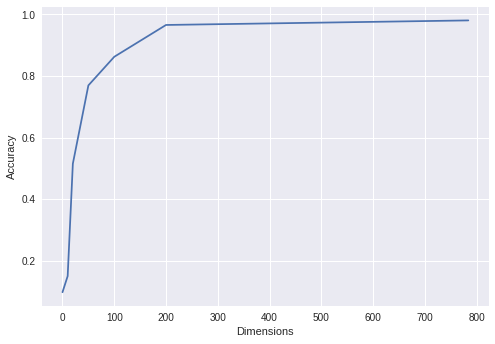

In [25]:
plt.plot(D, acc)
plt.xlabel('Dimensions')
plt.ylabel('Accuracy')
plt.show()

# **Training Model with Pre-initialized weights**

In [0]:
tf.reset_default_graph()
s1,u1,v1=tf.svd(wt1)
s2,u2,v2=tf.svd(wt2)
s3,u3,v3=tf.svd(wt3)
s4,u4,v4=tf.svd(wt4)
s5,u5,v5=tf.svd(wt5)

In [0]:
x = tf.placeholder(tf.float32, [None, 784])
y = tf.placeholder(tf.float32, [None, 10])

V1=tf.Variable(tf.matmul(tf.diag(s1)[:20,:20],tf.transpose(v1[:,:20])), name='V1')
V2=tf.Variable(tf.matmul(tf.diag(s2)[:20,:20],tf.transpose(v2[:,:20])), name='V2')				
V3=tf.Variable(tf.matmul(tf.diag(s3)[:20,:20],tf.transpose(v3[:,:20])), name='V3')				
V4=tf.Variable(tf.matmul(tf.diag(s4)[:20,:20],tf.transpose(v4[:,:20])), name='V4')				
V5=tf.Variable(tf.matmul(tf.diag(s5)[:20,:20],tf.transpose(v5[:,:20])), name='V5')	

U1=tf.Variable(u1[:,:20], name='U1')
U2=tf.Variable(u2[:,:20], name='U2')				
U3=tf.Variable(u3[:,:20], name='U3')				
U4=tf.Variable(u4[:,:20], name='U4')				
U5=tf.Variable(u5[:,:20], name='U5')

W7 = tf.Variable(op_wt, name='W7')

b1 = tf.Variable(bi1, name='b1')
b2 = tf.Variable(bi2, name='b2')
b3 = tf.Variable(bi3, name='b3')
b4 = tf.Variable(bi4, name='b4')
b5 = tf.Variable(bi5, name='b5')
b7 = tf.Variable(op_bi, name='b7')


L1 = tf.nn.relu(tf.add(tf.matmul(x,  tf.matmul(U1,V1)), b1) )
L2 = tf.nn.relu(tf.add(tf.matmul(L1, tf.matmul(U2,V2)), b2) )
L3 = tf.nn.relu(tf.add(tf.matmul(L2, tf.matmul(U3,V3)), b3) )
L4 = tf.nn.relu(tf.add(tf.matmul(L3, tf.matmul(U4,V4)), b4) )
L5 = tf.nn.relu(tf.add(tf.matmul(L4, tf.matmul(U5,V5)), b5) )
Y = tf.nn.softmax(tf.add(tf.matmul(L5, W7), b7))


correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

y_clipped = tf.clip_by_value(Y, 1e-10, 0.9999999)
cross_entropy = -tf.reduce_mean(tf.reduce_sum(y * tf.log(y_clipped)
                         + (1 - y) * tf.log(1 - y_clipped), axis=1))
optimiser = tf.train.GradientDescentOptimizer(learning_rate=0.005).minimize(cross_entropy)

In [40]:
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [52]:
learning_rate = 0.0001
epochs = 20
batch_size = 100
optimiser = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cross_entropy)

sess=tf.Session()
# initialise the variables
init_op = tf.global_variables_initializer()
sess.run(init_op)
total_batch = int(len(mnist.train.labels) / batch_size)
for epoch in range(epochs):
    avg_cost = 0
    for i in range(total_batch):
        batch_x, batch_y = mnist.train.next_batch(batch_size=batch_size)
        _ , c = sess.run([optimiser, cross_entropy], feed_dict={x: batch_x, y: batch_y})
        avg_cost += c / total_batch
    if(epoch==0 or (epoch+1)%5==0):
        print("Epoch:", (epoch + 1), "cost =", "{:.3f}".format(avg_cost))
    #print(sess.run(accuracy, feed_dict={x: mnist.test.images, y: mnist.test.labels}))
print("Test Accuracy: ",sess.run(accuracy, feed_dict={x: mnist.test.images, y: mnist.test.labels}))

Epoch: 1 cost = 0.414
Epoch: 5 cost = 0.255
Epoch: 10 cost = 0.221
Epoch: 15 cost = 0.205
Epoch: 20 cost = 0.191
Test Accuracy:  0.9633
